In [268]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]

In [269]:
f = lambda x, y: x**4+y**4-x*y

FITNESS_GOAL = 3
N_WINNERS = 30

INIT_X_AND_Y = 15
INIT_SIGMA = 0.4

In [270]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [271]:
def largestIndices(array, n):
    npArray = np.array(array)
    return list(npArray.argsort())[:n]

In [272]:
def plotOnGrid(args):
    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.scatter(args[0], args[1], s=100, marker='+', c='yellow')
    plt.scatter(args[2], args[3], s=200, marker='o', c='blue')

    return plt

In [273]:
class EvolutionStrategy(object):
    def __init__(self, currentX=INIT_X_AND_Y, currentY=INIT_X_AND_Y, sigma=INIT_SIGMA):
        self.currentX = currentX
        self.currentY = currentY
        self.sigma = sigma
        self.historicStates = [(INIT_X_AND_Y, INIT_X_AND_Y)]
        
    def ask(self):
        '''retruns a set of guesses'''
        self.solutions = np.random.multivariate_normal([self.currentX, self.currentY], [[self.sigma, 0],\
                                                                                        [0,self.sigma]], 100)
        return self.solutions
    
    def update(self, Indices):
        winning = [list(value) for index, value in enumerate(self.solutions) if index in Indices]
        ToPick = [int(i) for i in np.random.uniform(0, len(winning), size=2)]

        self.currentX = winning[ToPick[0]][0]
        self.currentY = winning[ToPick[1]][1]
        self.historicStates.append((self.currentX, self.currentY))
        
        XAxisWinning = [i[0] for i in winning]
        YAxisWinning = [i[1] for i in winning]
        
        return XAxisWinning, YAxisWinning
        
    def getStateHistory(self):
        XHistory = [i[0] for i in self.historicStates]
        YHistory = [i[1] for i in self.historicStates]
        
        return XHistory, YHistory

In [274]:
def getScores(solutions, f):
    scores = []
    for index, solution in enumerate(solutions):
        score = f(solution[0], solution[1])
        scores.append(score)
    return scores

In [ ]:
es = EvolutionStrategy(currentX=INIT_X_AND_Y, currentY=INIT_X_AND_Y, sigma=INIT_SIGMA)

fitness = np.inf
nIter = 0
while fitness > FITNESS_GOAL:
    solutions = es.ask()
    
    scores = getScores(solutions, f)
    bestIndicies = largestIndices(scores, N_WINNERS)
    
    x, y = es.update(bestIndicies)
    historicX, historicY = es.getStateHistory()
    
    toPlot = [x, y, historicX, historicY]
    plot = plotOnGrid(toPlot)
    plt.savefig('{}.png'.format(str(nIter)))
    
    fitness = f(es.currentX, es.currentY)
    nIter += 1

In [276]:
import imageio
images = []
for i in range(nIter):
    images.append(imageio.imread('/home/ido/{}.png'.format(str(i))))
imageio.mimsave('/home/ido/movie.gif', images)

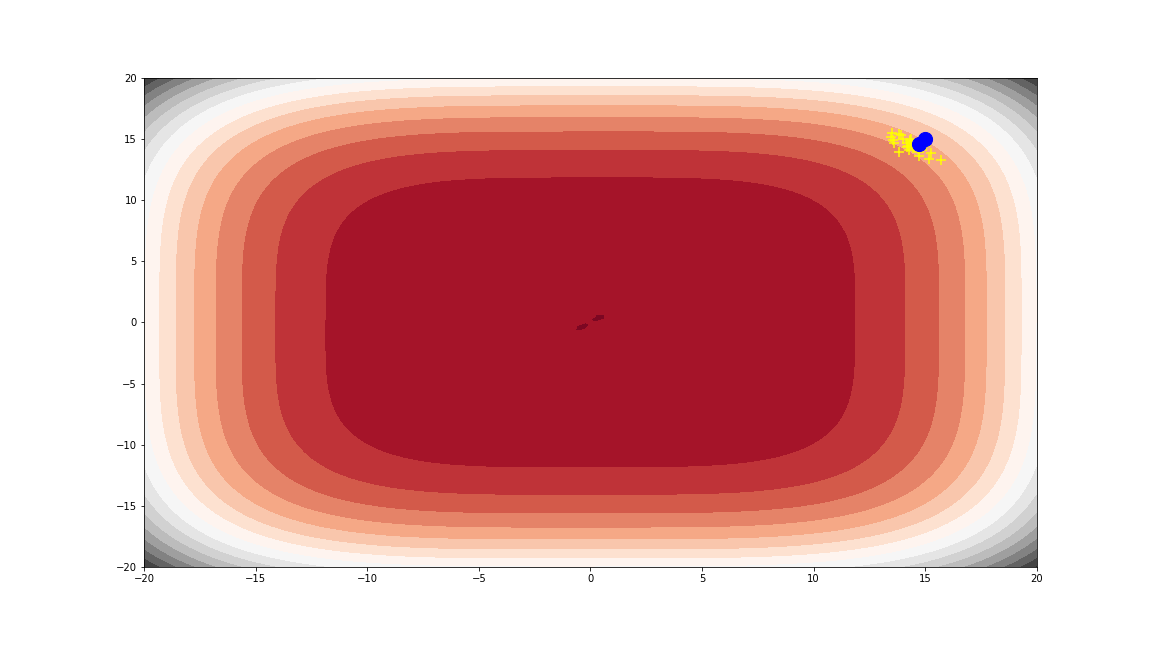

In [277]:
from IPython.display import Image

with open('/home/ido/movie.gif','rb') as f:
    display(Image(data=f.read(), format='png'))